In [1]:
import pandas as pd, numpy as np

#### 1.1 Load and Inspect your dataset by printing it's head. 


In [14]:
cabs=pd.read_csv("cab_rides_new_york.csv")


In [17]:
cabs.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1.540000e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1.540000e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1.540000e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1.540000e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.540000e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [18]:
import matplotlib as plt
%matplotlib inline


#### 1.2 Create two arrays, storing the names of all source and destination locations.
#### 1.3 Sort the two arrays and checks if the source and destination locations are identical

In [19]:
dest=cabs.destination.unique()
source=cabs.source.unique()
dest.sort()
source.sort()


In [20]:
source==dest

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

#### 1.4 Find out the different cab hailing companies (column=cab_type) and create seperate dataframes for each one of them. 




In [21]:
cabs.cab_type.unique() 

array(['Lyft', 'Uber'], dtype=object)

In [22]:
lyft=cabs.loc[cabs.cab_type=="Lyft"]
uber=cabs.loc[cabs.cab_type=="Uber"]

#### 2. Create a new column called base price that removes the effects of the surge multiplier from the price of the cab. [base price=(price/surge multiplier)]



In [23]:
lyft["base price"]=lyft["price"]/lyft['surge_multiplier']
uber["base price"]=uber["price"]/uber['surge_multiplier']


D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### 3. Use the lambda function, to create a new column in each company's dataframe such that it rounds of the distance value into integers.



In [24]:
lyft['distancelevel']=lyft.apply(lambda x: round(x['distance']),axis=1)
uber['distancelevel']=uber.apply(lambda x: round(x['distance']),axis=1)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### 4. Assuming that for the shortest distance (distance level=0), the lowest price (minimum price) for any given category represents the basic fee of the ride, run a for loop for all the categories and store the result in the list given below:
The list should be two dimensional, with each object being a smaller list. An example of this is as follow: 
-[[Name, min price],[name1,min_price1].....]

In [25]:
#for type 1 

temp=[]
for i in lyft.name.unique():
    k=lyft.loc[lyft.name==i]
    temp.append([i,k.loc[k.distancelevel==0]["base price"].min()])
    

    
temp = pd.DataFrame(temp,columns=['Name','Price'])

In [26]:
#for type 2

temp1=[]
for i in uber.name.unique():
    k=uber.loc[uber.name==i]
    temp1.append([i,k.loc[k.distancelevel==0]["base price"].min()])
    

temp1=pd.DataFrame(temp1,columns=['Name','Price'])


#### 5. Using Matplotlib, create bar charts for the dataframes created in the previous question.(Name-X axis, Price-Yaxis)). The process for the same is given here: https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm


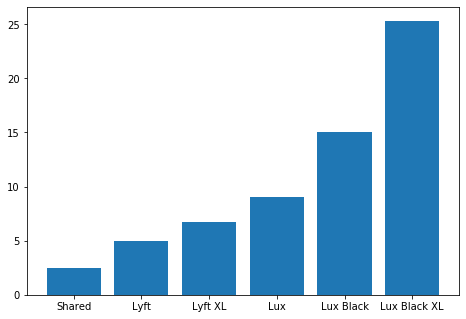

In [27]:
#temp

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
temp=temp.sort_values("Price")

ax.bar(temp['Name'],temp['Price'])
plt.show()

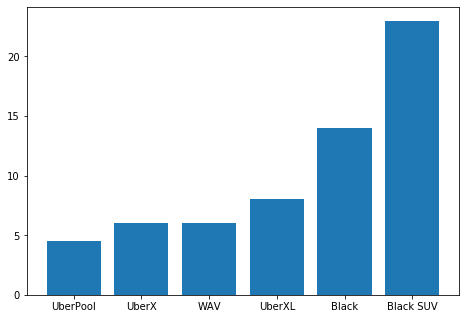

In [28]:
#temp1
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
temp1=temp1.sort_values("Price")
ax.bar(temp1['Name'],temp1['Price'])
plt.show()


#### 6. Assess these bar charts to identify which categories from each cab hailing company map to one another in terms of their basic fee. 
-Example: Uber's uberpool maps with lyft's shared 

######  uberpool: Shared 
###### uberX: Lyft 
###### WAV: LiftXL
###### UberXL: Lux
###### Black: Lux Black 
###### BlackSUV: LuxBlackXL